In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('result/combined.csv')
df

,Repository,File Name,Class,Start Line,End Line,Displacement,Level,Source File
0,tests,conftest.py,Generator Function (yield),57,57,8,C1,p.csv
1,tests,test_requests.py,Generator Expression,2374,2374,26,C1,p.csv
2,tests,test_requests.py,Import'pickle' module,8,8,0,C1,p.csv
3,tests,test_requests.py,Import're' module,9,9,0,C1,p.csv
4,tests,utils.py,Generator Function (yield),14,14,8,C1,p.csv
...,...,...,...,...,...,...,...,...
70,requests,structures.py,Generator Expression,58,58,15,C1,original
71,requests,structures.py,Generator Expression,65,65,15,C1,original
72,requests,adapters.py,Super Function,141,141,8,C2,original
73,requests,adapters.py,Super Function,216,216,8,C2,original


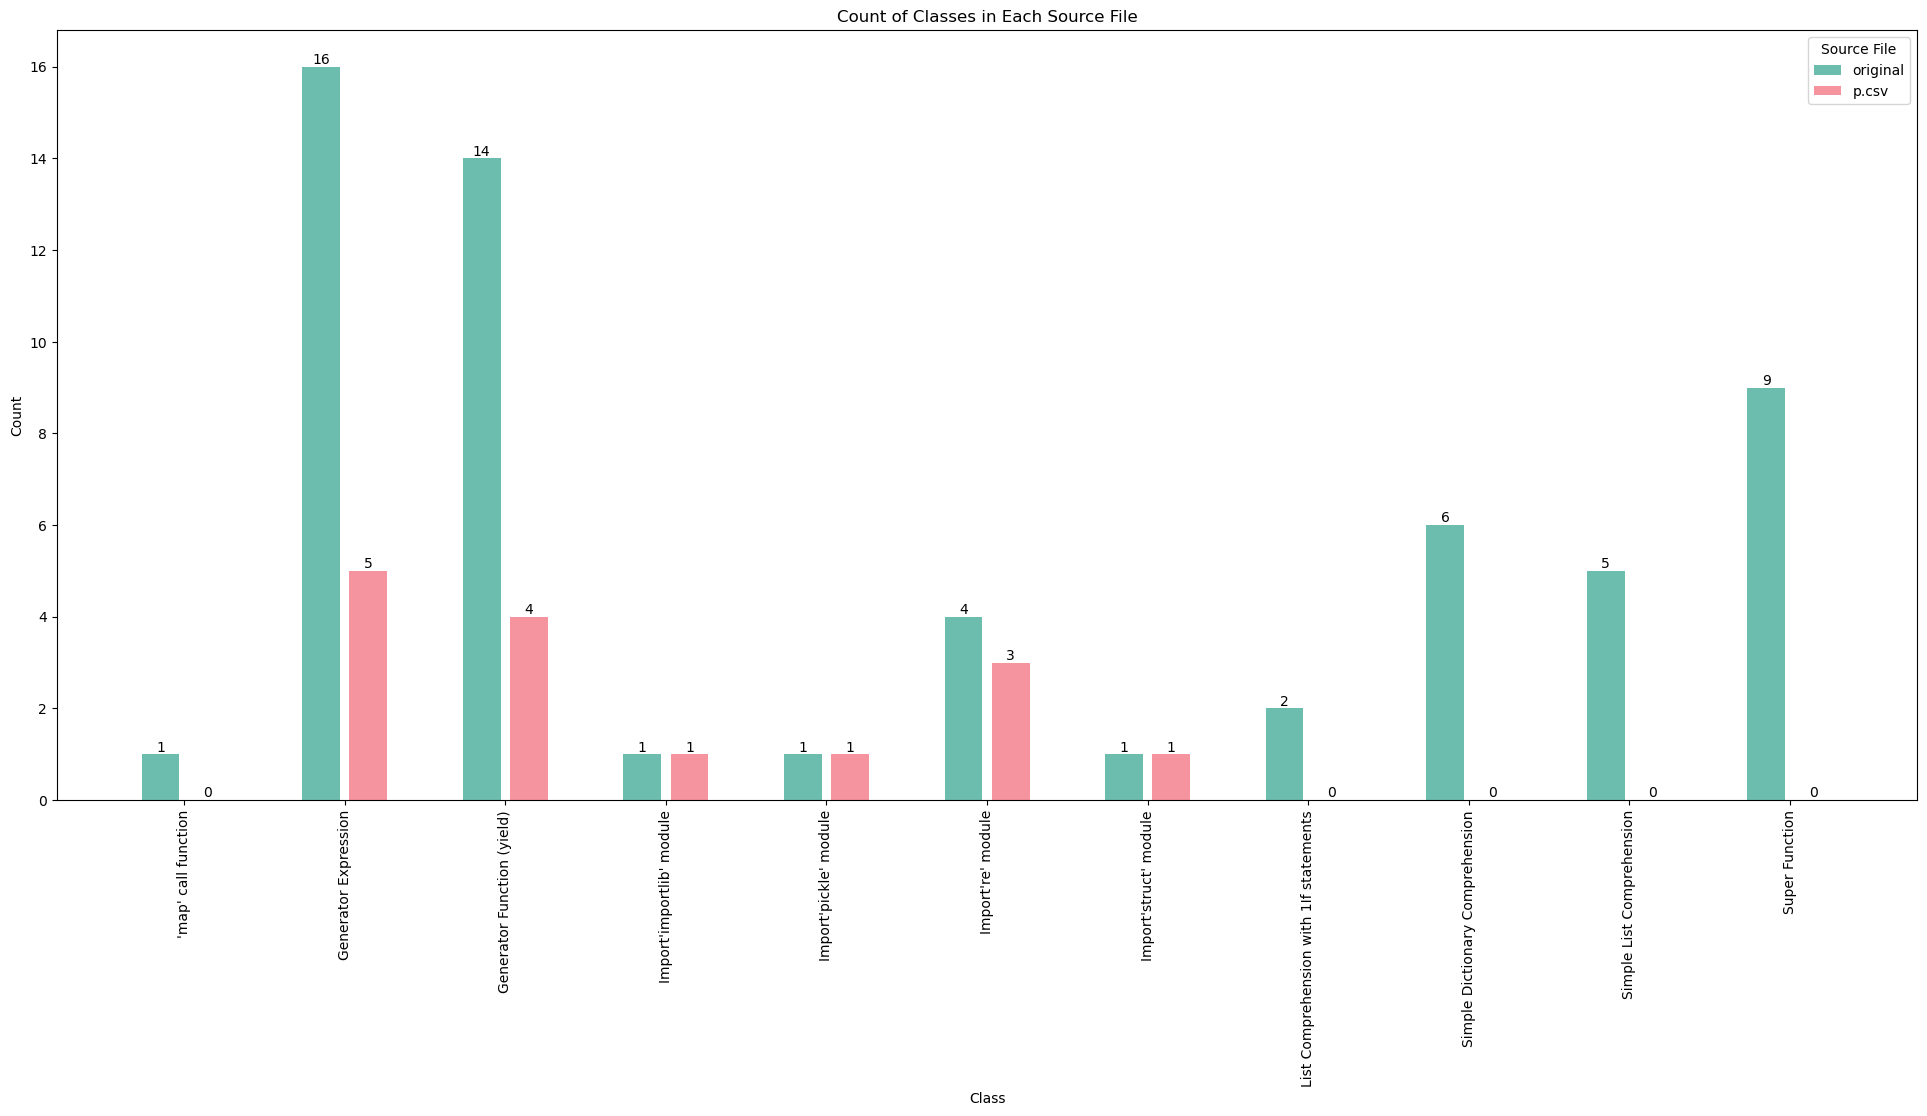

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the combined CSV file
combined_df = pd.read_csv('result/combined.csv')

# Split the combined DataFrame into separate DataFrames based on the 'Source File' column
# n1_df = combined_df[combined_df['Source File'] == 'n1.csv']
# n2_df = combined_df[combined_df['Source File'] == 'n2.csv']
p_df = combined_df[combined_df['Source File'] == 'p.csv']
original_df = combined_df[combined_df['Source File'] == 'original']

# Group by 'Class' and count the occurrences in each DataFrame
# n1_class_count = n1_df.groupby('Class')['Source File'].count()
# n2_class_count = n2_df.groupby('Class')['Source File'].count()
p_class_count = p_df.groupby('Class')['Source File'].count()
original_class_count = original_df.groupby('Class')['Source File'].count()

# Combine the counts into a single DataFrame for plotting
class_counts = pd.DataFrame({
    'original': original_class_count,
#     'n1.csv': n1_class_count,
#     'n2.csv': n2_class_count,
    'p.csv': p_class_count
}).fillna(0)

# Set the figure size
fig, ax = plt.subplots(figsize=(24, 10))

# Calculate the number of bars and set the width and padding
num_classes = len(class_counts)
bar_width = 0.2
intra_group_padding = 0.05
inter_group_padding = 0.4  # Increased padding between groups
group_width = bar_width * len(class_counts.columns) + intra_group_padding * (len(class_counts.columns) - 1)
indices = np.arange(num_classes) * (group_width + inter_group_padding)

# Define custom colors for each group of bars
# colors = ['#EC8471', '#F0D361', '#6DBDAF', '#7499D5']  # Add your preferred colors
# colors = ['#6DBDAF', '#F5939E', '#FBC56F', '#4E90CC']
colors = ['#6DBDAF', '#F5939E']


# Plot each group of bars with custom colors
for i, (source_file, color) in enumerate(zip(class_counts.columns, colors)):
    ax.bar(indices + i * (bar_width + intra_group_padding), class_counts[source_file], bar_width, label=source_file, color=color)

# Set the title and labels
ax.set_title('Count of Classes in Each Source File')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticks(indices + group_width / 2 - bar_width / 2)
ax.set_xticklabels(class_counts.index, rotation=90)
ax.legend(title='Source File')

# Add the count numbers on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()
